In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
)

In [ ]:
# Load dataset
df = pd.read_csv("./data/Housing.csv")
print(df.head())

      price  area  bedrooms  ...  parking  prefarea furnishingstatus
0  13300000  7420         4  ...        2       yes        furnished
1  12250000  8960         4  ...        3        no        furnished
2  12250000  9960         3  ...        2       yes   semi-furnished
3  12215000  7500         4  ...        3       yes        furnished
4  11410000  7420         4  ...        2        no        furnished

[5 rows x 13 columns]


In [ ]:
# Encoding những columns không phải dạng số thành dạng số để dễ xử lý

# Lấy ra columns không có dạng số
categorical_cols = df.select_dtypes(include=["object"]).columns.to_list()

print(categorical_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [ ]:
# Dùng OrdinalEncoder để convert những columns trên sang dạng số
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_cols])
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols, columns=categorical_cols
)
encoded_categorical_df

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Tách columns có dạng số ở df ban đầu và nối với columns không có dạng số đã được encoded để tạo ra df mới
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)
print(encoded_df)

        price  area  bedrooms  ...  airconditioning  prefarea  furnishingstatus
0    13300000  7420         4  ...              1.0       1.0               0.0
1    12250000  8960         4  ...              1.0       0.0               0.0
2    12250000  9960         3  ...              0.0       1.0               1.0
3    12215000  7500         4  ...              1.0       1.0               0.0
4    11410000  7420         4  ...              1.0       0.0               0.0
..        ...   ...       ...  ...              ...       ...               ...
540   1820000  3000         2  ...              0.0       0.0               2.0
541   1767150  2400         3  ...              0.0       0.0               1.0
542   1750000  3620         2  ...              0.0       0.0               2.0
543   1750000  2910         3  ...              0.0       0.0               0.0
544   1750000  3850         3  ...              0.0       0.0               2.0

[545 rows x 13 columns]


In [10]:
# Từ df mới, tiến hành normalization
normalization = StandardScaler()
dataset_arr = normalization.fit_transform(encoded_df)

print(dataset_arr)

[[ 4.56636513  1.04672629  1.40341936 ...  1.4726183   1.80494113
  -1.40628573]
 [ 4.00448405  1.75700953  1.40341936 ...  1.4726183  -0.55403469
  -1.40628573]
 [ 4.00448405  2.21823241  0.04727831 ... -0.67906259  1.80494113
  -0.09166185]
 ...
 [-1.61432675 -0.70592066 -1.30886273 ... -0.67906259 -0.55403469
   1.22296203]
 [-1.61432675 -1.03338891  0.04727831 ... -0.67906259 -0.55403469
  -1.40628573]
 [-1.61432675 -0.5998394   0.04727831 ... -0.67906259 -0.55403469
   1.22296203]]


In [ ]:
# Train Test Split
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]  # y = price
test_size = 0.3
random_state = 1
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=test_size, random_state=random_state, shuffle=is_shuffle
)

print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of val samples: {X_val.shape[0]}")


Number of training samples: 381
Number of val samples: 164


In [12]:
# Training bằng RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print("Evaluation results on validation set:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Evaluation results on validation set:
Mean Absolute Error: 0.46855804545893837
Mean Squared Error: 0.39899228962513233


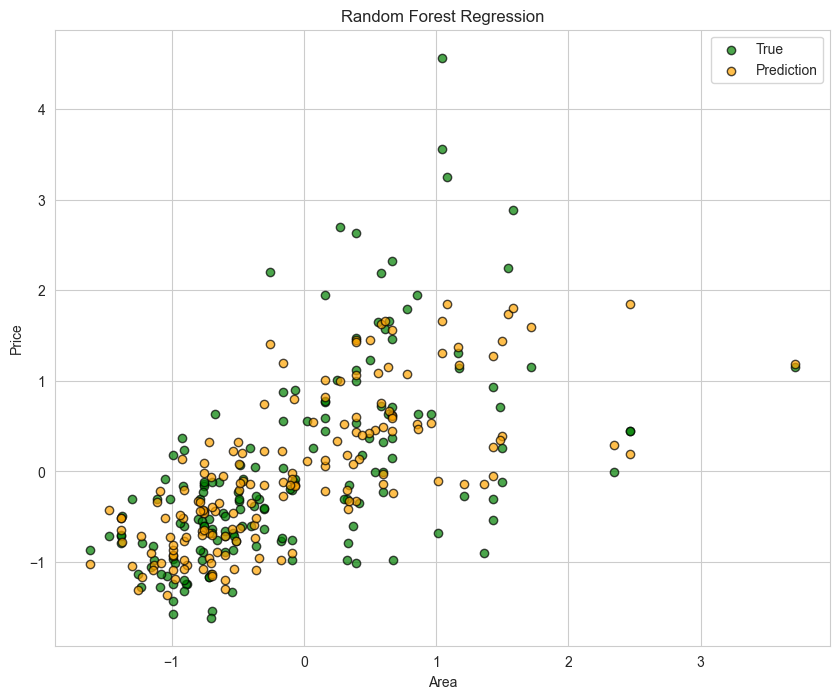

In [ ]:
# Cấu hình Seaborn để biểu đồ trông đẹp hơn
sns.set_style("whitegrid")

# Tạo một hình vẽ và một trục
plt.figure(figsize=(10, 8))

# Vẽ biểu đồ cho giá trị thực tế
plt.scatter(X_val[:, 0], y_val, color="green", label="True", alpha=0.7, edgecolor="k")

# Vẽ biểu đồ cho giá trị dự đoán
plt.scatter(
    X_val[:, 0], y_pred, color="orange", label="Prediction", alpha=0.7, edgecolor="k"
)

# Thêm tiêu đề và nhãn
plt.title("Random Forest Regression")
plt.xlabel("Area")
plt.ylabel("Price")

# Thêm chú thích và lưới
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

In [18]:
# Load dataset
df = pd.read_csv("./data/my_xxxx.csv")
print(df.head())

   ID Gender  Experience (Years)               Position  Salary
0   1      F                   4        DevOps Engineer  109976
1   2      M                   6        DevOps Engineer  120088
2   3      M                  17          Web Developer  181301
3   4      M                   7  Systems Administrator   77530
4   5      F                  13  Systems Administrator  152397


In [19]:
categorical_cols = df.select_dtypes(include=["object"]).columns.to_list()
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_cols])
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols, columns=categorical_cols
)
encoded_categorical_df

,Gender,Position
0,0.0,2.0
1,1.0,2.0
2,1.0,10.0
3,1.0,8.0
4,0.0,8.0
...,...,...
345,1.0,7.0
346,0.0,10.0
347,0.0,2.0
348,1.0,8.0


In [20]:
# Tách columns có dạng số ở df ban đầu và nối với columns không có dạng số đã được encoded để tạo ra df mới
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)
print(encoded_df)

      ID  Experience (Years)  Salary  Gender  Position
0      1                   4  109976     0.0       2.0
1      2                   6  120088     1.0       2.0
2      3                  17  181301     1.0      10.0
3      4                   7   77530     1.0       8.0
4      5                  13  152397     0.0       8.0
..   ...                 ...     ...     ...       ...
345  346                   4  107647     1.0       7.0
346  347                  12  147836     0.0      10.0
347  348                  19  242819     0.0       2.0
348  349                   9  115769     1.0       8.0
349  350                  16   93819     1.0      10.0

[350 rows x 5 columns]


In [ ]:
new_df = encoded_df.drop(columns=["Salary"])
new_df = pd.concat([new_df, encoded_df["Salary"]], axis=1)
new_df


,ID,Experience (Years),Gender,Position,Salary
0,1,4,0.0,2.0,109976
1,2,6,1.0,2.0,120088
2,3,17,1.0,10.0,181301
3,4,7,1.0,8.0,77530
4,5,13,0.0,8.0,152397
...,...,...,...,...,...
345,346,4,1.0,7.0,107647
346,347,12,0.0,10.0,147836
347,348,19,0.0,2.0,242819
348,349,9,1.0,8.0,115769


In [44]:
X, y = new_df.iloc[:,1:-1], new_df.iloc[:,-1]
print(X)

     Experience (Years)  Gender  Position
0                     4     0.0       2.0
1                     6     1.0       2.0
2                    17     1.0      10.0
3                     7     1.0       8.0
4                    13     0.0       8.0
..                  ...     ...       ...
345                   4     1.0       7.0
346                  12     0.0      10.0
347                  19     0.0       2.0
348                   9     1.0       8.0
349                  16     1.0      10.0

[350 rows x 3 columns]


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

normalizer = StandardScaler()
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.fit_transform(X_test)

In [47]:
import xgboost as xgb

In [48]:
xg_class = xgb.XGBClassifier(seed=7)
xg_class.fit(X_train_scaled, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279], got [ 43643  48710  49817  54739  55964  57567  57838  59145  61236  62204
  62301  64736  65646  67127  67396  67910  68000  70195  70591  70610
  70941  71211  71389  72006  73364  74688  75749  77058  78006  79108
  79431  79944  82328  82987  83147  84342  84510  85199  85246  86110
  86225  86362  86818  87698  87871  87875  89662  90049  90340  90393
  90576  90721  91480  91842  92288  92514  92927  93165  93558  93819
  93860  94615  94797  94989  95631  95988  97051  97317  97706  98814
 100026 100091 100616 101107 101278 102783 103124 103201 103746 103940
 105182 105563 106131 106204 107263 107647 108040 108050 108860 108998
 109573 109601 109928 109976 110084 110321 110734 111025 111156 111250
 111316 111362 111494 112471 112487 113345 114492 114608 114764 114791
 114996 115201 115263 115698 115769 116363 116529 116853 116964 117934
 119320 120088 120102 120104 120142 120172 120406 121293 122207 123049
 124153 125282 125514 125521 126171 126492 126811 127148 127533 127764
 128179 128220 128503 129155 129205 130002 130058 130119 131176 131530
 131757 131847 131849 132171 132311 132670 132950 133155 133508 133765
 134208 134293 134437 134871 135066 135205 135496 135999 136355 136537
 136900 137302 137535 137662 137897 139069 139766 140147 140241 141261
 142031 142525 143412 145253 145530 145856 146249 147270 147836 148118
 148410 148634 149040 149160 149360 149569 149762 149970 150031 150102
 150286 150681 150802 150854 152397 152404 153634 153779 154443 154557
 155017 156027 156738 157380 157705 157825 158031 158415 158855 158856
 159549 159630 161408 162398 162487 164340 166104 168536 168554 171297
 172094 173720 174612 175368 176976 177180 178265 179006 180331 180669
 181201 181301 181654 181711 181774 183382 183411 186239 187353 188681
 188959 190192 190752 193399 196175 196310 196839 200409 204549 205418
 205579 206324 207518 207529 214282 214420 215034 217422 218258 224671
 226461 232972 235235 242808 242819 244446 252949 260594 268774 269950]

In [46]:
# Training bằng RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("Evaluation results on validation set:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {r2}")

Evaluation results on validation set:
Mean Absolute Error: 100135.2408629315
Mean Squared Error: 10250350868.286627
Mean Squared Error: -13363310004.838163


/Users/vychan/Coding/AIO2025/Code/aio2025_study/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
ab = AdaBoostRegressor(n_estimators=50)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_val)
print("The accuracy_score of the model is:", round(r2_score(y_val, y_pred), 4))

The accuracy_score of the model is: 0.4267


In [36]:
print(new_df)

      ID  Experience (Years)  Gender  Position  Salary
0      1                   4     0.0       2.0  109976
1      2                   6     1.0       2.0  120088
2      3                  17     1.0      10.0  181301
3      4                   7     1.0       8.0   77530
4      5                  13     0.0       8.0  152397
..   ...                 ...     ...       ...     ...
345  346                   4     1.0       7.0  107647
346  347                  12     0.0      10.0  147836
347  348                  19     0.0       2.0  242819
348  349                   9     1.0       8.0  115769
349  350                  16     1.0      10.0   93819

[350 rows x 5 columns]
